In [1]:
# Misc
def plot_accuracy_and_loss(history1, title1, history2, title2):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(history1.history['accuracy'], label=f'{title1} Train Accuracy')
  plt.plot(history1.history['val_accuracy'], label=f'{title1} Val Accuracy')
  plt.plot(history2.history['accuracy'], label=f'{title2} Train Accuracy', linestyle='--')
  plt.plot(history2.history['val_accuracy'], label=f'{title2} Val Accuracy', linestyle='--')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(history1.history['loss'], label=f'{title1} Train Loss')
  plt.plot(history1.history['val_loss'], label=f'{title1} Val Loss')
  plt.plot(history2.history['loss'], label=f'{title2} Train Loss', linestyle='--')
  plt.plot(history2.history['val_loss'], label=f'{title2} Val Loss', linestyle='--')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

In [2]:
!pip install ucimlrepo

Z opisu zbioru:

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.  The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions.  The transmitted sonar signal is a frequency-modulated chirp, rising in frequency.  The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).  The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.5517 - loss: 0.6530 - val_accuracy: 0.7381 - val_loss: 0.4838
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8498 - loss: 0.3852 - val_accuracy: 0.8095 - val_loss: 0.4171
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9203 - loss: 0.2273 - val_accuracy: 0.8571 - val_loss: 0.3323
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9873 - loss: 0.1206 - val_accuracy: 0.8333 - val_loss: 0.3007
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0560 - val_accuracy: 0.9286 - val_loss: 0.3173
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9937 - loss: 0.0314 - val_accuracy: 0.8810 - val_loss: 0.4019
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.9048 - val_loss: 0.4707
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.9048 - val_loss

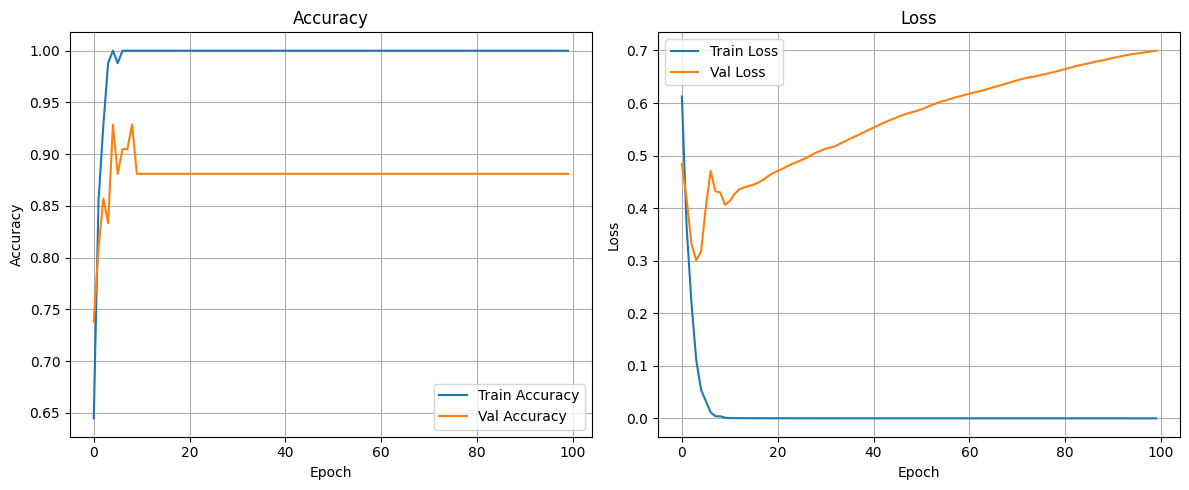

In [3]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

sonar = fetch_ucirepo(id=151)
X_raw = sonar.data.features   # 208×60
y_raw = sonar.data.targets    # 'R' or 'M'

# Zmiana na binarne dane: Rock=0, Mine=1
y = (y_raw == 'M').astype(int)

# Split na dane uczące i testowe
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Przeskalowanie
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# (zbyt) Duży model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64,  activation='relu'),
    Dense(1,   activation='sigmoid')
])


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


start = time.time()
# Trening
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start} sekund")

# Wykresy
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],  label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],      label='Train Loss')
plt.plot(history.history['val_loss'],  label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Jak widać błąd dla jest znacznie wyższy przy testowaniu i celność spada o 0.1 względem uczenia.

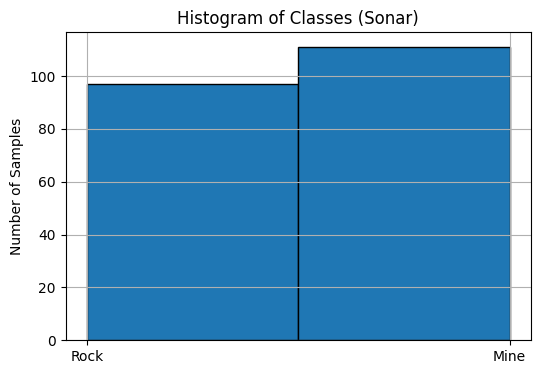

In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(y, bins=2, edgecolor='k')
plt.xticks([0, 1], ['Rock', 'Mine'])
plt.title('Histogram of Classes (Sonar)')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()


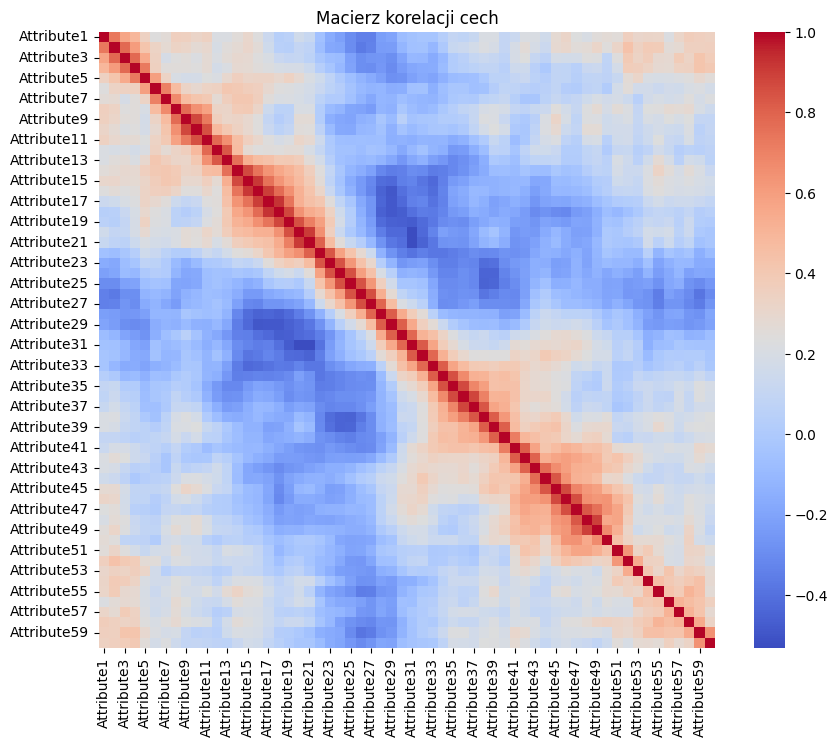

In [5]:

# Correlation matrix heatmap
corr_matrix = X_raw.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Macierz korelacji cech")
plt.show()



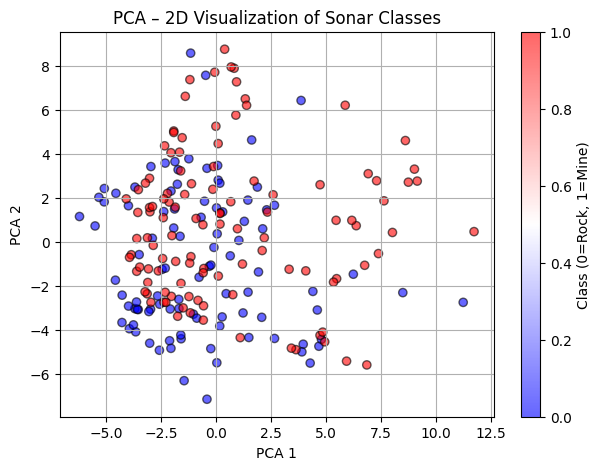

In [6]:
# PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

y = (y_raw.values.flatten() == 'M').astype(int)
plt.figure(figsize=(7, 5))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='bwr',
    alpha=0.6, edgecolors='k'
)
plt.title('PCA – 2D Visualization of Sonar Classes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
cbar = plt.colorbar(label='Class (0=Rock, 1=Mine)')
plt.show()

Klasy są dosyć zmieszane, ale widać pewne przesunięcie kamieni względem metali.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


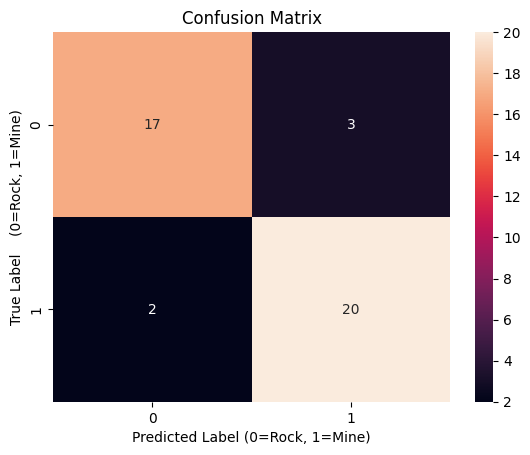

In [7]:
# Macierz pomyłek
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label (0=Rock, 1=Mine)')
plt.ylabel('True Label    (0=Rock, 1=Mine)')
plt.show()

# 1. Uproszczenie modelu


In [8]:
# mniejszy model
small_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1,   activation='sigmoid')
])


small_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


start = time.time()
# Trening
small_history = small_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start} sekund")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.5762 - loss: 0.6624 - val_accuracy: 0.6905 - val_loss: 0.6132
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7097 - loss: 0.5869 - val_accuracy: 0.7143 - val_loss: 0.5895
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7768 - loss: 0.5443 - val_accuracy: 0.7381 - val_loss: 0.5699
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7537 - loss: 0.5316 - val_accuracy: 0.7381 - val_loss: 0.5503
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8130 - loss: 0.4910 - val_accuracy: 0.7381 - val_loss: 0.5314
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8495 - loss: 0.4506 - val_accuracy: 0.7381 - val_loss: 0.5116
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8465 - loss: 0.4439 - val_accuracy: 0.7619 - val_loss: 0.4950
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8818 - loss: 0.4156 - val_accuracy: 0.7857 - val_loss

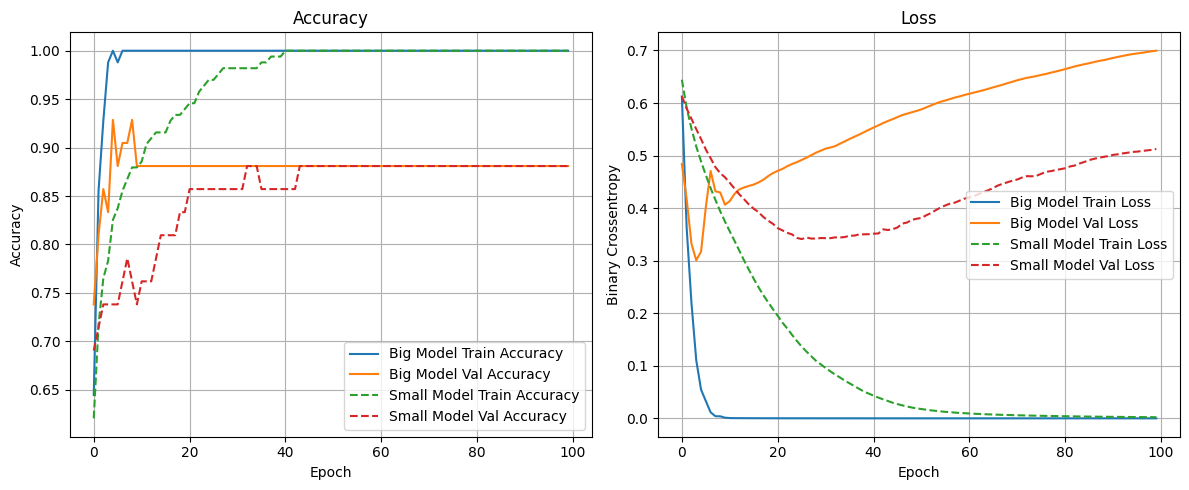

In [9]:
plot_accuracy_and_loss(history, 'Big Model', small_history, 'Small Model')

# Ocena
Uproszczenie modelu delikatnie poprawiło celność i zminiejszyło straty o połowę

# 2. Dropout

In [10]:
from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64,  activation='relu'),
    Dense(1,   activation='sigmoid')
])

dropout_model.compile(optimizer=Adam(5e-4), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

dropout_history = dropout_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.6366 - loss: 0.6582 - val_accuracy: 0.6667 - val_loss: 0.5675
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7060 - loss: 0.5761 - val_accuracy: 0.7857 - val_loss: 0.4868
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8126 - loss: 0.4788 - val_accuracy: 0.8095 - val_loss: 0.4340
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7891 - loss: 0.4089 - val_accuracy: 0.7857 - val_loss: 0.3849
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8697 - loss: 0.3074 - val_accuracy: 0.8095 - val_loss: 0.3298
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8779 - loss: 0.2813 - val_accuracy: 0.9048 - val_loss: 0.2897
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8819 - loss: 0.2404 - val_accuracy: 0.8571 - val_loss: 0.2889
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9616 - loss: 0.1674 - val_accuracy: 0.9048 - val_loss: 0.2754
Epoc

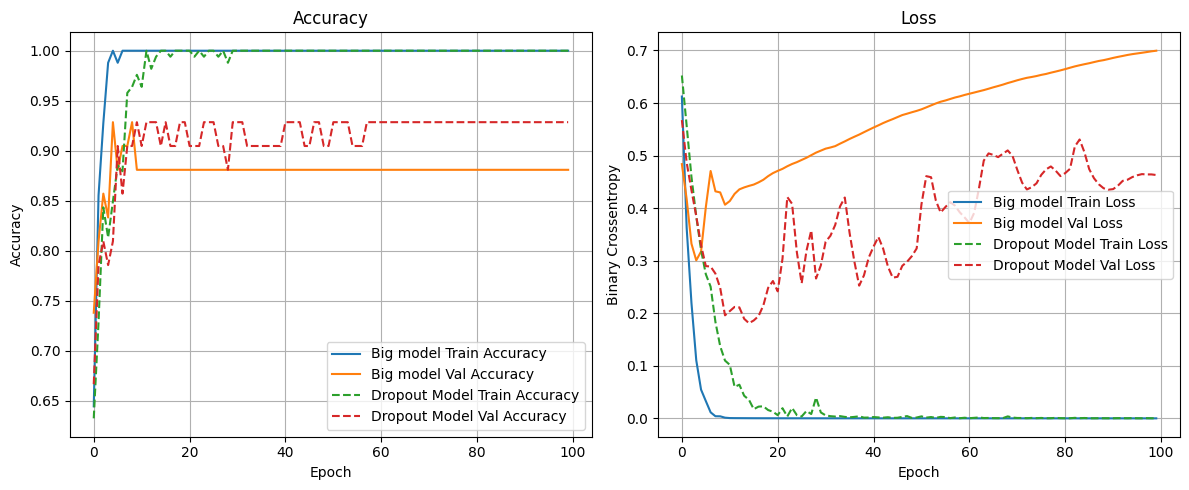

In [11]:
plot_accuracy_and_loss(history, 'Big model', dropout_history, 'Dropout Model')

# Ocena
Dropout niezależnie od dobranych parametrów nie chciał dać lepszych wyników dla strat, natomiast poprawił celność (niby tylko o 0.05 ale to połowa tego co można osiągnąć maksymalnie z 0.9 xD)

# 3. L2


In [12]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential([
    Dense(512, activation='relu',
          kernel_regularizer=l2(1e-8),
          input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu',
          kernel_regularizer=l2(1e-8)),
    Dense(128, activation='relu',
          kernel_regularizer=l2(1e-8)),
    Dense(64, activation='relu',
          kernel_regularizer=l2(3e-5)),
    Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

l2_history = l2_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.6325 - loss: 0.6736 - val_accuracy: 0.7619 - val_loss: 0.5202
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8623 - loss: 0.4460 - val_accuracy: 0.7381 - val_loss: 0.4521
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8556 - loss: 0.3183 - val_accuracy: 0.7857 - val_loss: 0.3828
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9199 - loss: 0.2009 - val_accuracy: 0.8810 - val_loss: 0.2628
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9679 - loss: 0.1137 - val_accuracy: 0.8810 - val_loss: 0.1987
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9948 - loss: 0.0635 - val_accuracy: 0.8810 - val_loss: 0.1849
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0258 - val_accuracy: 0.8810 - val_loss: 0.2086
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.8810 - val_loss

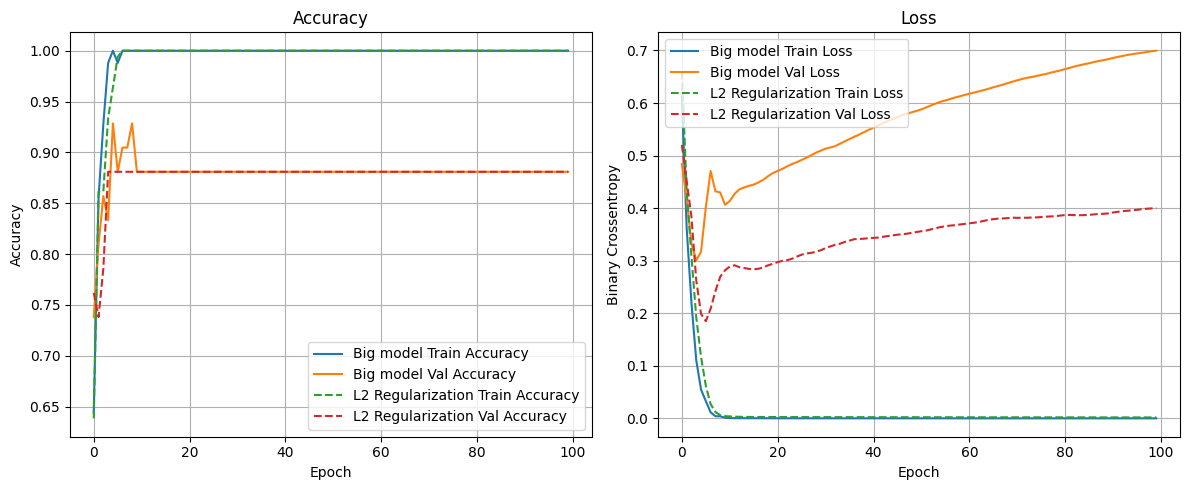

In [13]:
plot_accuracy_and_loss(history, 'Big model', l2_history, 'L2 Regularization')

# Ocena
Udało się obniżyć starty i podnieść celność.

# 4. L1

In [14]:
from tensorflow.keras.regularizers import l1

l1_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(1e-8), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l1(1e-5)),
    Dense(128, activation='relu', kernel_regularizer=l1(1e-5)),
    Dense(64, activation='relu', kernel_regularizer=l1(1e-3)),
    Dense(1, activation='sigmoid')
])

l1_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
l1_history = l1_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6614 - loss: 1.4440 - val_accuracy: 0.7619 - val_loss: 1.2698
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8852 - loss: 1.1726 - val_accuracy: 0.8095 - val_loss: 1.1485
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8958 - loss: 1.0023 - val_accuracy: 0.7857 - val_loss: 1.0669
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9434 - loss: 0.8967 - val_accuracy: 0.8571 - val_loss: 0.9722
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9554 - loss: 0.8262 - val_accuracy: 0.8810 - val_loss: 0.8941
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9974 - loss: 0.7336 - val_accuracy: 0.9048 - val_loss: 0.9551
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.6789 - val_accuracy: 0.8810 - val_loss: 0.9009
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.6346 - val_accuracy: 0.8810 - val_loss: 0.8423
Epoc

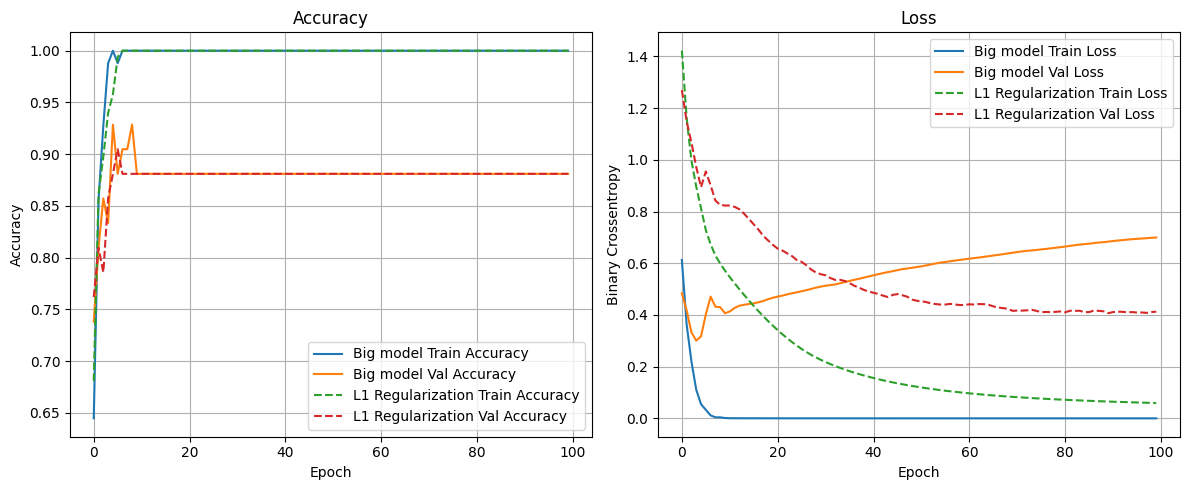

In [15]:
plot_accuracy_and_loss(history, 'Big model', l1_history, 'L1 Regularization')

# Ocena
Straty odrobinę lepiej niż przy L2, a celność odrobinę gorzej.

# 5. Early Stopping


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

early_stop_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start = time.time()

early_history = early_stop_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6474 - loss: 0.6529 - val_accuracy: 0.7143 - val_loss: 0.5202
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8497 - loss: 0.4119 - val_accuracy: 0.7619 - val_loss: 0.4536
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8823 - loss: 0.2881 - val_accuracy: 0.8333 - val_loss: 0.3728
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9497 - loss: 0.1877 - val_accuracy: 0.8095 - val_loss: 0.3068
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9646 - loss: 0.1229 - val_accuracy: 0.8810 - val_loss: 0.2350
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9974 - loss: 0.0567 - val_accuracy: 0.8810 - val_loss: 0.2153
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.9286 - val_loss: 0.2350
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 0.9048 - val_loss: 0.2788
Epoc

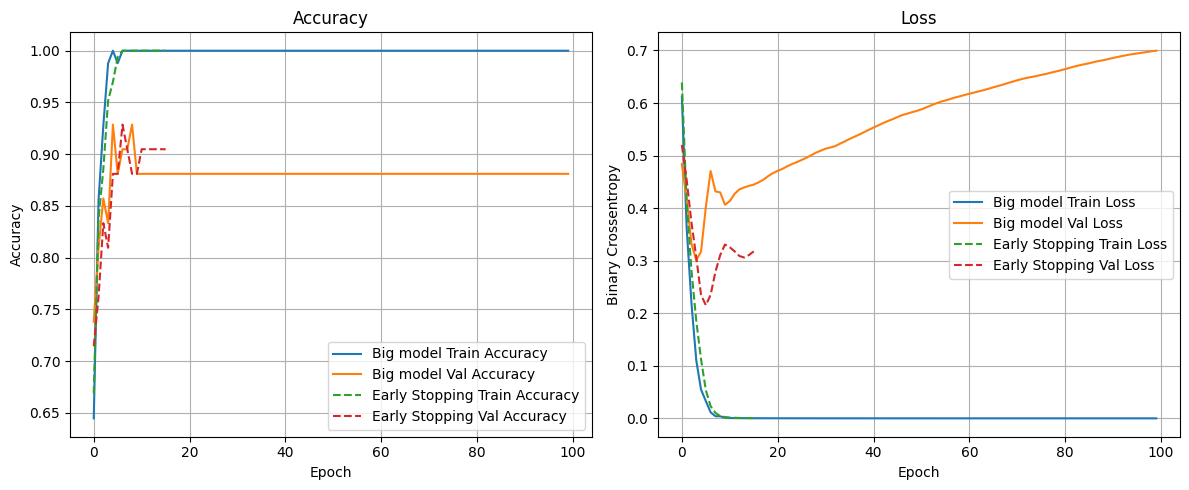

In [17]:
plot_accuracy_and_loss(history, 'Big model', early_history, 'Early Stopping')

# Ocena
Early stopping w tym przypadku może nieznacznie poprawić celność i starty. Wyniki bardzo losowe w zależności od wywołania. Za to czas wykonywania dużo szybszy dzięki przerwaniu po kilkunastu epokach.

# Połączony model

In [18]:
from tensorflow.keras.regularizers import l1_l2
reg_big   = l1_l2(l1=1e-6, l2=1e-4)
reg_mid   = l1_l2(l1=1e-7, l2=1e-5)
reg_small = l1_l2(l1=1e-8, l2=1e-6)

combined_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=reg_big, input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=reg_mid),
    Dropout(0.2),
    Dense(64, activation='relu',  kernel_regularizer=reg_small),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

combined_model.compile(optimizer=Adam(5e-4), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
combined_history = combined_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)
end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.5222 - loss: 0.7247 - val_accuracy: 0.6667 - val_loss: 0.6333
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7095 - loss: 0.6271 - val_accuracy: 0.7381 - val_loss: 0.5918
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7250 - loss: 0.5890 - val_accuracy: 0.7381 - val_loss: 0.5529
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7865 - loss: 0.5476 - val_accuracy: 0.7381 - val_loss: 0.5222
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7709 - loss: 0.4901 - val_accuracy: 0.7381 - val_loss: 0.4944
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8214 - loss: 0.4518 - val_accuracy: 0.7381 - val_loss: 0.4766
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8434 - loss: 0.4607 - val_accuracy: 0.7619 - val_loss: 0.4602
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8748 - loss: 0.3943 - val_accuracy: 0.7857 - val_loss: 0.4366
Epo

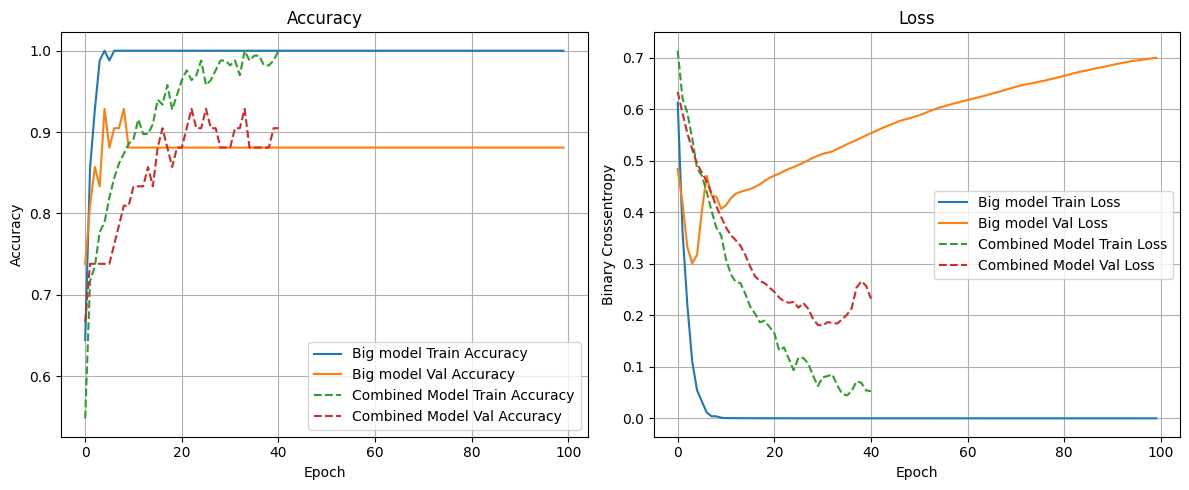

In [19]:
plot_accuracy_and_loss(history, 'Big model', combined_history, 'Combined Model')

Połączony model nie radzi sobie jakoś lepiej niż proste zmniejszenie sieci.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


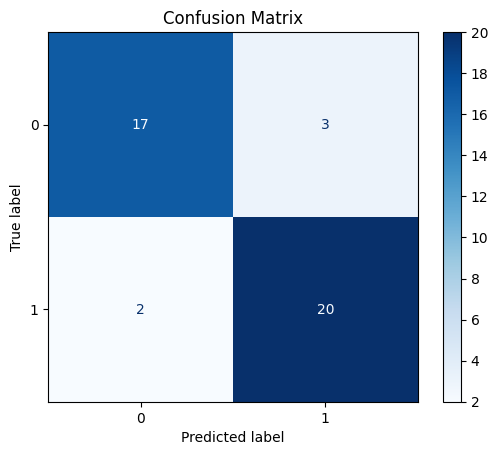

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.87      0.91      0.89        22

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve, auc

y_pred = combined_model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_labels))


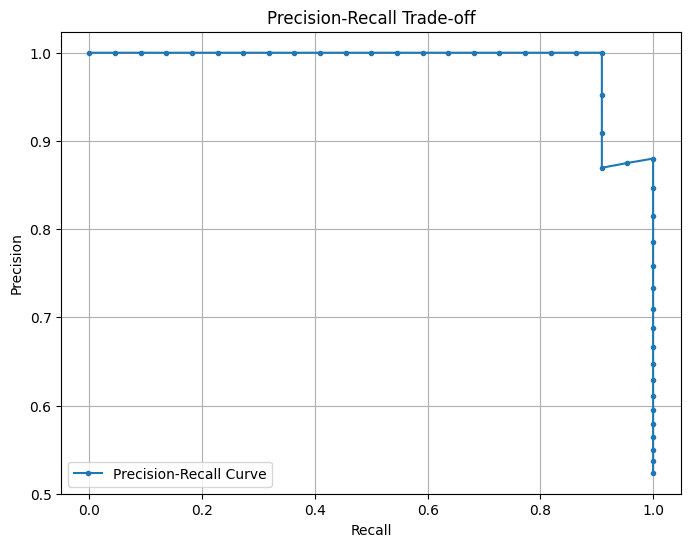

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off')
plt.grid(True)
plt.legend()
plt.show()


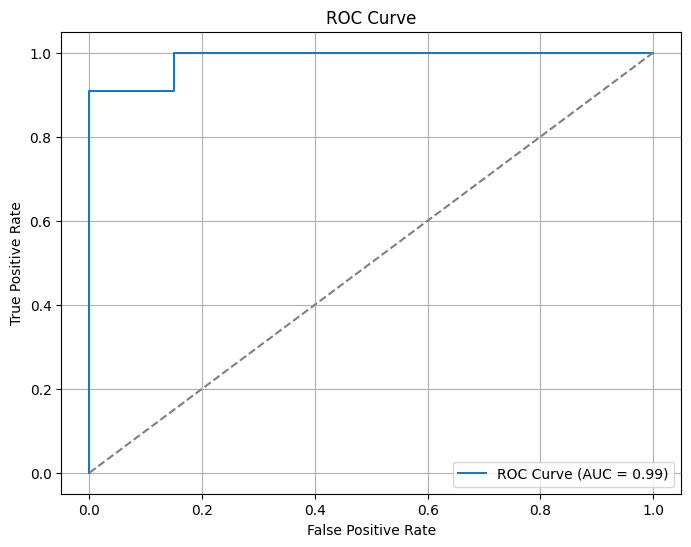

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 7.7495e-06 - val_accuracy: 0.8810 - val_loss: 0.7022
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 6.5151e-06 - val_accuracy: 0.8810 - val_loss: 0.7054
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 6.1617e-06 - val_accuracy: 0.8810 - val_loss: 0.7087
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 6.5904e-06 - val_accuracy: 0.8810 - val_loss: 0.7116
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 1.0000 - loss: 6.4239e-06 - val_accuracy: 0.8810 - val_loss: 0.7145
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 5.9022e-06 - val_accuracy: 0.8810 - val_loss: 0.7175
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 5.7573e-06 - val_accuracy: 0.8810 - val_loss: 0.7204
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 5.5103e-0

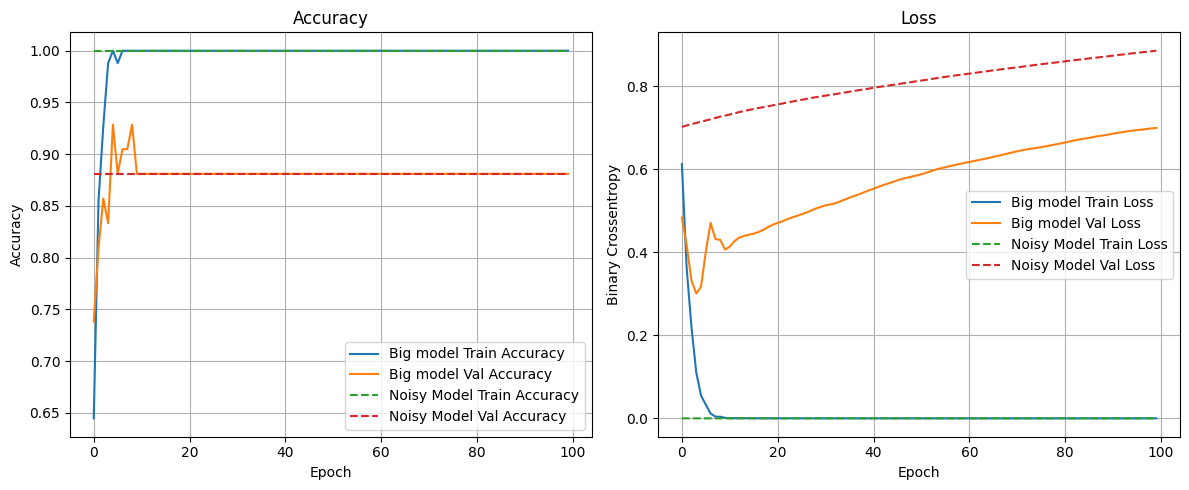

In [24]:
import numpy as np

noise_level = 0.01
X_train_noisy = X_train_scaled + np.random.normal(
    loc=0.0, scale=noise_level, size=X_train_scaled.shape
)
y_train_noisy = y_train.copy()

X_train_aug = np.vstack([X_train_scaled, X_train_noisy])
y_train_aug = np.concatenate([y_train, y_train_noisy])

noise_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
noise_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start = time.time()
noise_history = model.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start:.2f} sekund")

plot_accuracy_and_loss(history, 'Big model', noise_history, 'Noisy Model')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 4.7381e-07 - val_accuracy: 0.8810 - val_loss: 0.8862
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 4.6899e-07 - val_accuracy: 0.8810 - val_loss: 0.8867
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 4.9755e-07 - val_accuracy: 0.8810 - val_loss: 0.8872
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 4.0451e-07 - val_accuracy: 0.8810 - val_loss: 0.8878
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 1.0000 - loss: 5.1177e-07 - val_accuracy: 0.8810 - val_loss: 0.8884
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 5.0295e-07 - val_accuracy: 0.8810 - val_loss: 0.8889
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 4.8877e-07 - val_accuracy: 0.8810 - val_loss: 0.8895
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 4.3871e-07 - val_accurac

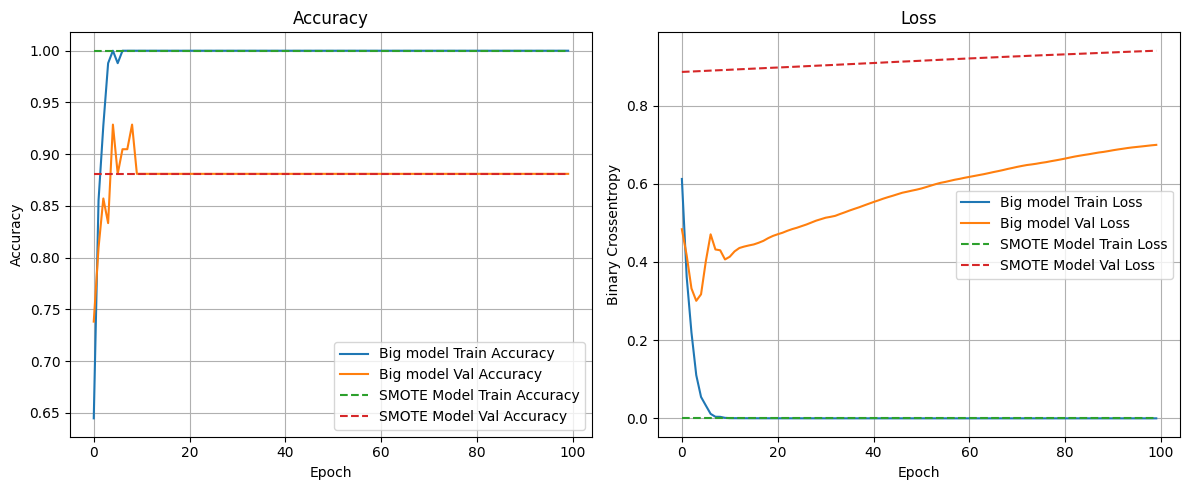

In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

smote_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
smote_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start = time.time()
smote_history = model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start:.2f} sekund")

plot_accuracy_and_loss(history, 'Big model', smote_history, 'SMOTE Model')
